In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [2]:
from binance.client import Client
from binance import enums
api_key = "your key"
api_secret = "your secret"
client = Client(api_key, api_secret)

In [3]:
import cryptoz
from cryptoz import stats, utils, plot

# params

In [4]:
pairs = [
    'BNB/USDT',
    'BTC/USDT',
    'XRP/USDT', 
    'ETH/USDT', 
    'ADA/USDT', 
    'XLM/USDT', 
    'XVG/USDT', 
    'LTC/USDT', 
    'IOTA/USDT', 
    'QTUM/USDT', 
    'NEO/USDT', 
    'DASH/USDT', 
    'ETC/USDT', 
    'LSK/USDT', 
    'XMR/USDT', 
    'OMG/USDT', 
    'STRAT/USDT', 
    'ZEC/USDT',
    'BCC/USDT'
]

In [5]:
interval = enums.KLINE_INTERVAL_1HOUR
display_window = pd.Timedelta(days=3)

# data

In [6]:
from cryptoz.exchanges.binance import Binance
reload(cryptoz.exchanges)

binance = Binance(client)

In [7]:
ohlc = binance.get_ohlc(pairs, interval=interval)

19 pairs:
BNB/USDT.. done
BTC/USDT.. done
XRP/USDT.. using XRP/BTC cross BTC/USDT.. done
ETH/USDT.. done
ADA/USDT.. using ADA/BTC cross BTC/USDT.. done
XLM/USDT.. using XLM/BTC cross BTC/USDT.. done
XVG/USDT.. using XVG/BTC cross BTC/USDT.. done
LTC/USDT.. done
IOTA/USDT.. using IOTA/BTC cross BTC/USDT.. done
QTUM/USDT.. using QTUM/BTC cross BTC/USDT.. done
NEO/USDT.. done
DASH/USDT.. using DASH/BTC cross BTC/USDT.. done
ETC/USDT.. using ETC/BTC cross BTC/USDT.. done
LSK/USDT.. using LSK/BTC cross BTC/USDT.. done
XMR/USDT.. using XMR/BTC cross BTC/USDT.. done
OMG/USDT.. using OMG/BTC cross BTC/USDT.. done
STRAT/USDT.. using STRAT/BTC cross BTC/USDT.. done
ZEC/USDT.. using ZEC/BTC cross BTC/USDT.. done
BCC/USDT.. done


# basics

## price

    count     mean       std       min       25%       50%       75%       max
0  1368.0 -0.17258  0.329073 -0.796184 -0.448345 -0.210749  0.029422  0.712995


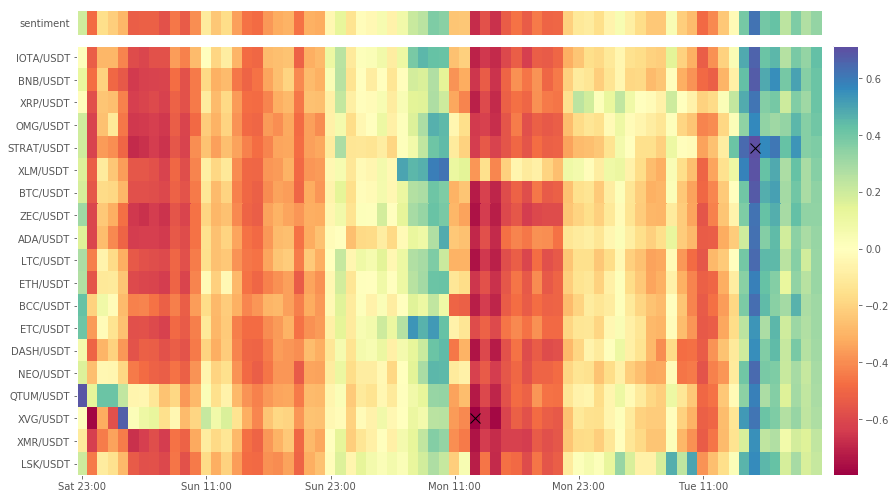

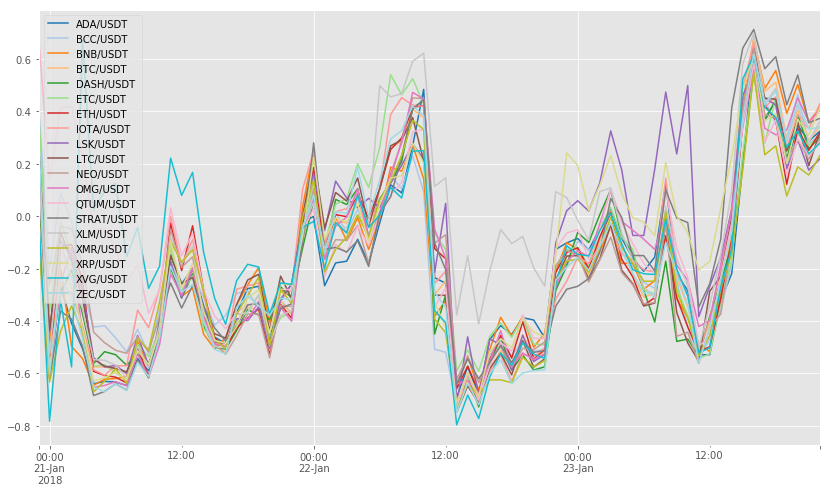

In [19]:
window = 20

df = utils.to_df(ohlc, 'C')
# price relative to mean of previous prices
df = utils.rolling_normalize(df, 'mean', window)
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

df.plot(figsize=(14, 8), cmap=plt.cm.tab20)
plt.show()

In [20]:
df = utils.to_df(ohlc, 'C')
df = df.pct_change().dropna()
df.iloc[-1].sort_values()

ZEC/USDT      0.002037
ETC/USDT      0.004137
BCC/USDT      0.004378
ADA/USDT      0.005427
DASH/USDT     0.005908
OMG/USDT      0.005960
ETH/USDT      0.006347
XVG/USDT      0.006362
STRAT/USDT    0.006971
LSK/USDT      0.007452
XMR/USDT      0.007495
BTC/USDT      0.007709
QTUM/USDT     0.007876
BNB/USDT      0.010988
NEO/USDT      0.012845
XLM/USDT      0.014333
LTC/USDT      0.014604
IOTA/USDT     0.015486
XRP/USDT      0.019597
Name: 2018-01-23 22:00:00, dtype: float64

    count      mean       std       min       25%       50%       75%  \
0  1368.0 -0.001991  0.026339 -0.116835 -0.018187 -0.000952  0.013567   

        max  
0  0.170207  


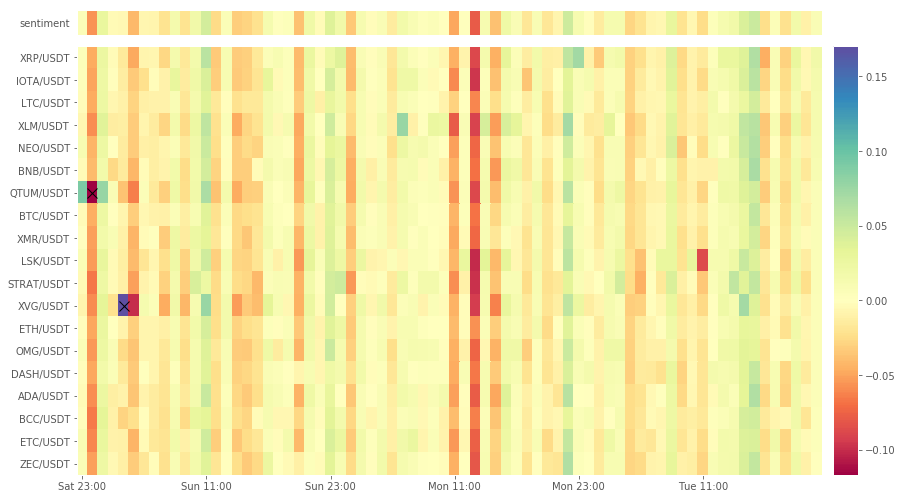

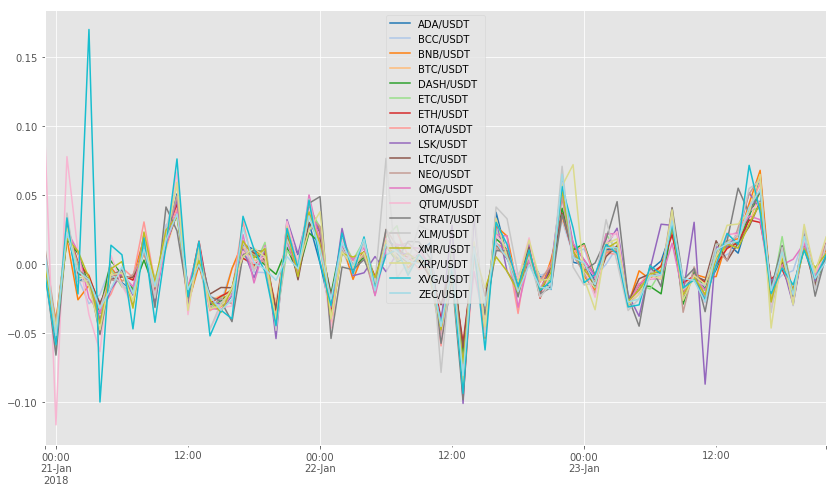

In [22]:
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

df.plot(figsize=(14, 8), cmap=plt.cm.tab20)
plt.show()

## volatility

In [23]:
df = utils.to_df(ohlc, 'C')
df = df.std() / df.mean()
df.sort_values()

XMR/USDT      0.104559
ETC/USDT      0.126331
ETH/USDT      0.131316
BTC/USDT      0.144324
LTC/USDT      0.146580
OMG/USDT      0.149884
DASH/USDT     0.152421
STRAT/USDT    0.158380
ZEC/USDT      0.160440
IOTA/USDT     0.169663
QTUM/USDT     0.169971
LSK/USDT      0.171044
BCC/USDT      0.171825
NEO/USDT      0.173694
XLM/USDT      0.202998
ADA/USDT      0.227755
BNB/USDT      0.247864
XVG/USDT      0.263336
XRP/USDT      0.286314
dtype: float64

    count      mean       std       min      25%       50%       75%       max
0  1368.0  0.010055  0.106112 -0.403524 -0.03461  0.002328  0.050775  0.705418


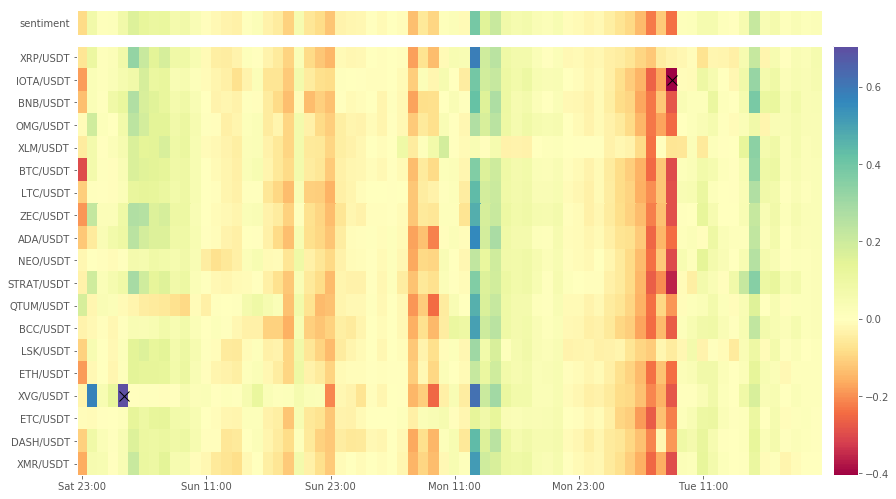

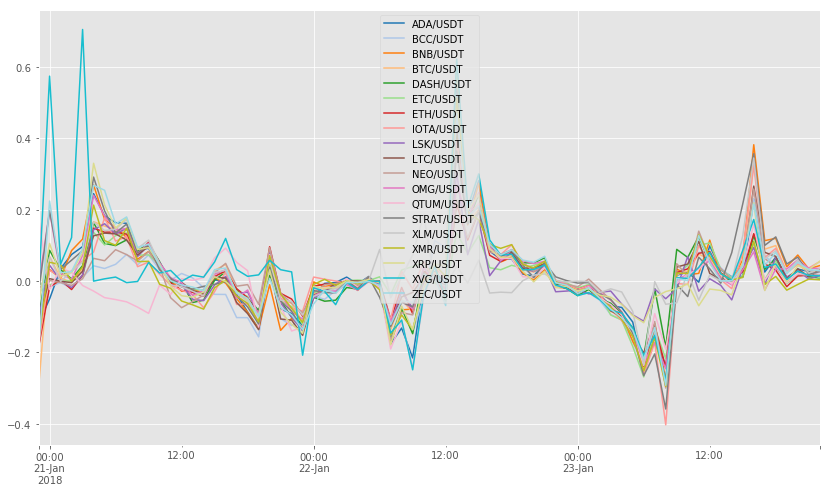

In [25]:
window = 20

df = utils.to_df(ohlc, 'C')
df = df.rolling(window).std()
df = df.pct_change().dropna()
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

df.plot(figsize=(14, 8), cmap=plt.cm.tab20)
plt.show()

## volume

    count      mean       std       min       25%       50%       75%  \
0  1368.0 -0.024046  0.271166 -0.499444 -0.209163 -0.090521  0.088648   

        max  
0  0.938048  


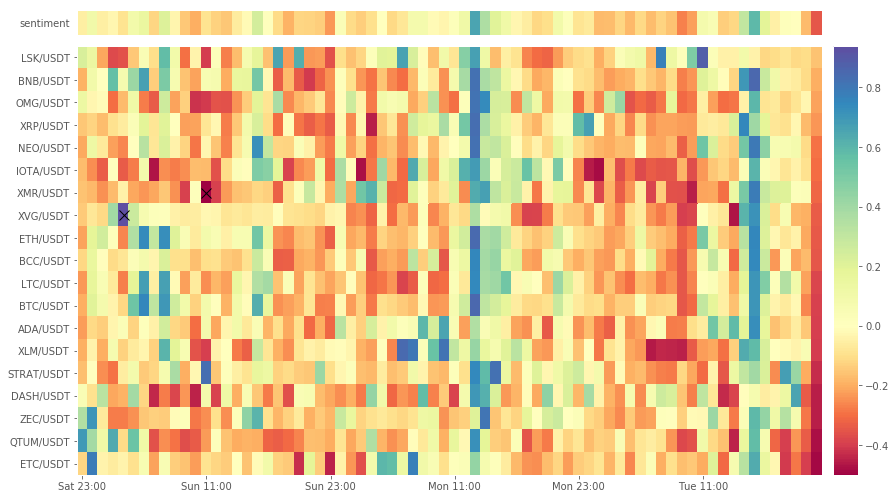

In [27]:
window = 20

df = utils.to_df(ohlc, 'V')
# volume relative to mean of previous volumes
df = utils.rolling_normalize(df, 'mean', window)
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

# drawdown

## global

In [28]:
stats.dd.now(ohlc)

XMR/USDT      0.301289
ETH/USDT      0.306319
BTC/USDT      0.355796
NEO/USDT      0.371118
DASH/USDT     0.383742
ETC/USDT      0.388656
LTC/USDT      0.426571
OMG/USDT      0.441010
ZEC/USDT      0.445459
LSK/USDT      0.447527
BCC/USDT      0.450751
IOTA/USDT     0.452702
BNB/USDT      0.465052
STRAT/USDT    0.476219
XLM/USDT      0.507918
QTUM/USDT     0.521975
ADA/USDT      0.554847
XRP/USDT      0.582360
XVG/USDT      0.632073
dtype: float64

## local

    count      mean       std       min       25%       50%       75%  \
0  1368.0  0.169944  0.067625  0.006472  0.122955  0.168489  0.218213   

        max  
0  0.356873  


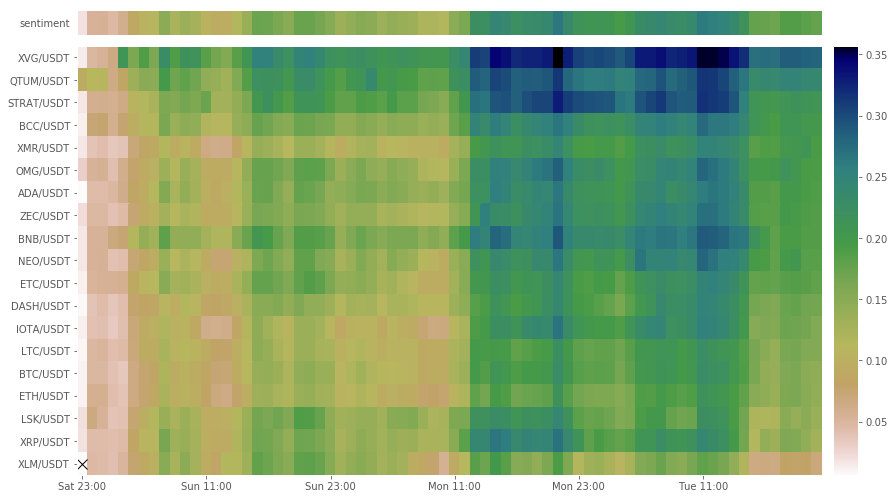

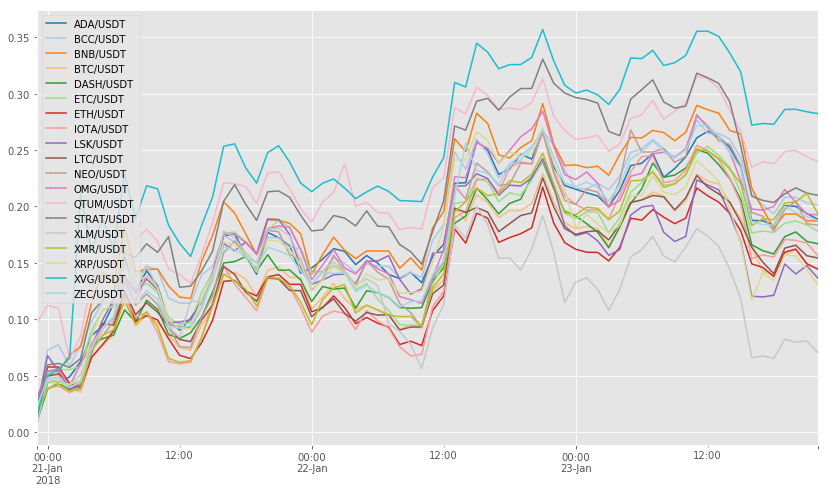

In [30]:
recent_ohlc = utils.cut(ohlc, display_window)
df = stats.dd.from_ohlc(recent_ohlc)

plot.evolution(df, plt.cm.gist_earth_r, rank='last')

df.plot(figsize=(14, 8), cmap=plt.cm.tab20)
plt.show()

# correlation

    count      mean       std       min       25%       50%      75%       max
0  1080.0  0.916815  0.098099  0.314586  0.906165  0.949058  0.96796  0.992622


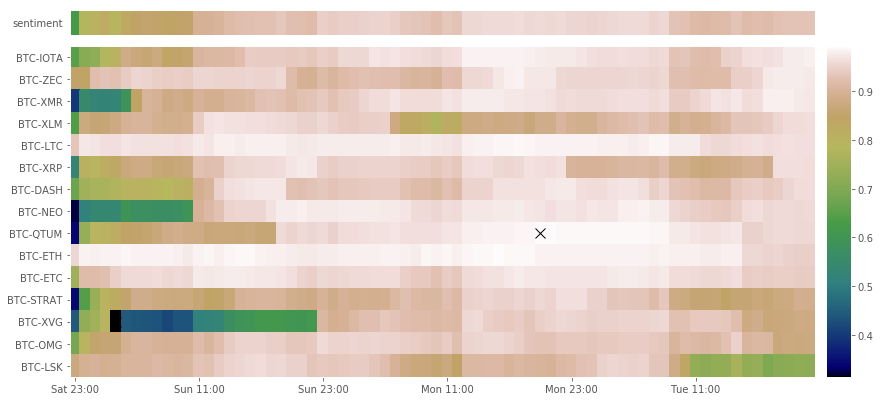

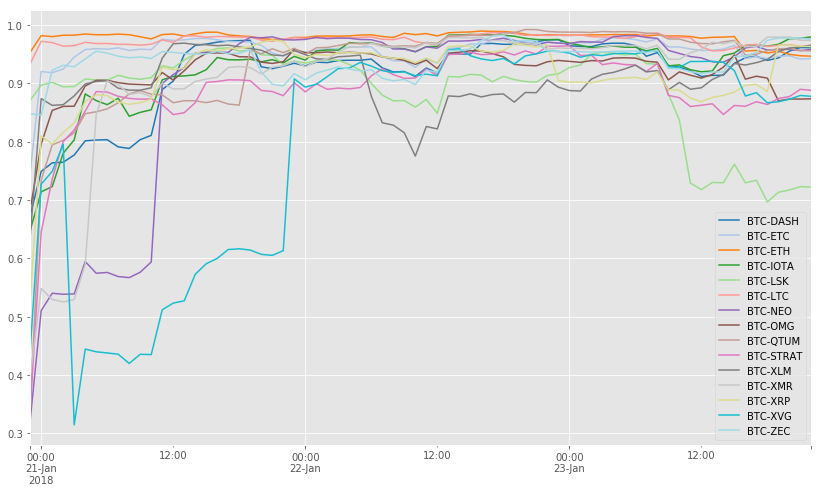

In [32]:
window = 20
base_pair = 'BTC/USDT'

df = utils.to_df(ohlc, 'C').pct_change().dropna()
df = stats.corr.rolling(df, window=window)
regex = re.compile(r'(%s-.+)' % base_pair)
df = df[list(filter(regex.search, df.columns))]
df.columns = list(map(lambda x: re.sub(r'(/%s)' % base_pair.split('/')[1], '', x), df.columns))
df.dropna(inplace=True)
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.gist_earth, rank='last')

df.plot(figsize=(14, 8), cmap=plt.cm.tab20)
plt.show()

# anomaly detection

## price

    count      mean       std  min  25%  50%  75%  max
0  1368.0 -0.371345  0.897594 -3.0 -1.0  0.0  0.0  3.0


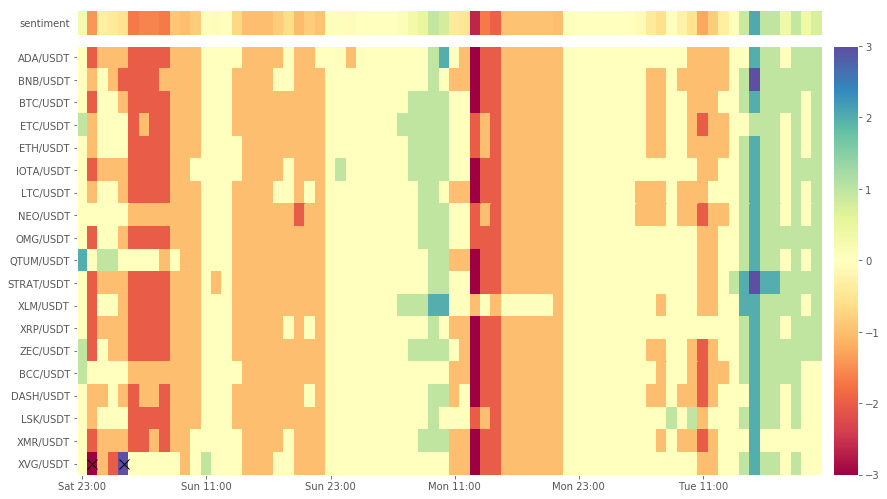

In [38]:
window = 20
levels = [1, 2, 3, 4, 5]

df = utils.to_df(ohlc, 'C')
df = utils.rolling_normalize(df, 'std', window)
df.dropna(inplace=True)
df = utils.classify(df, levels, bipolar=True)
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

## volume

    count      mean      std  min  25%  50%  75%  max
0  1368.0  0.070175  0.75792 -2.0 -0.0 -0.0 -0.0  4.0


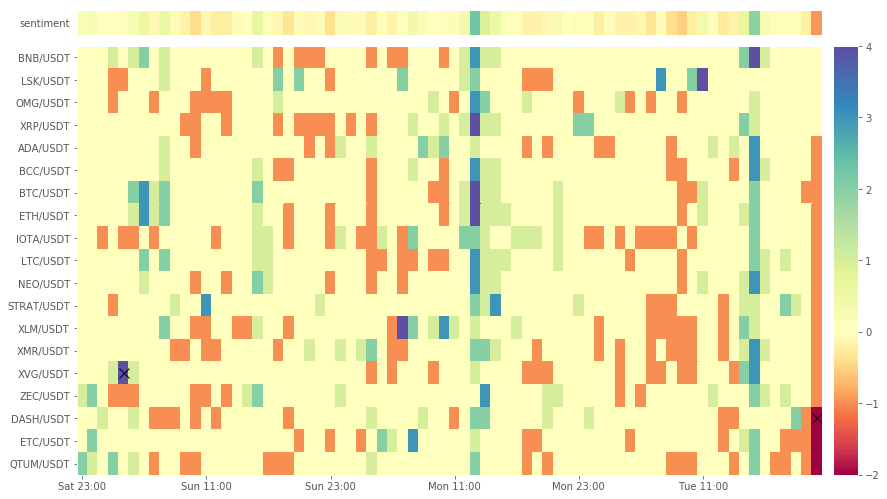

In [37]:
window = 20
levels = [1, 2, 3, 4, 5]

df = utils.to_df(ohlc, 'V')
df = utils.rolling_normalize(df, 'std', window)
df.dropna(inplace=True)
df = utils.classify(df, levels, bipolar=True)
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

# oscillators

## *RSI*

In [39]:
def RSI(df, window):
    delta = df.diff().dropna()
    up, down = delta * 0, delta * 0
    pos_mask = delta > 0
    neg_mask = delta < 0
    up[pos_mask] = delta[pos_mask]
    down[neg_mask] = -delta[neg_mask]
    up.iloc[window - 1] = up.iloc[:window].mean()
    up = up.iloc[window - 1:]
    down.iloc[window - 1] = down.iloc[:window].mean()
    down = down.iloc[window - 1:]
    rs = up.ewm(com=window - 1, adjust=False).mean() / down.ewm(com=window - 1, adjust=False).mean()
    rsi = 100 - 100 / (1 + rs)
    return rsi.reindex(df.index)

    count      mean       std       min       25%       50%       75%  max
0  1368.0 -0.269096  0.300274 -0.988197 -0.497019 -0.289342 -0.051248  1.0


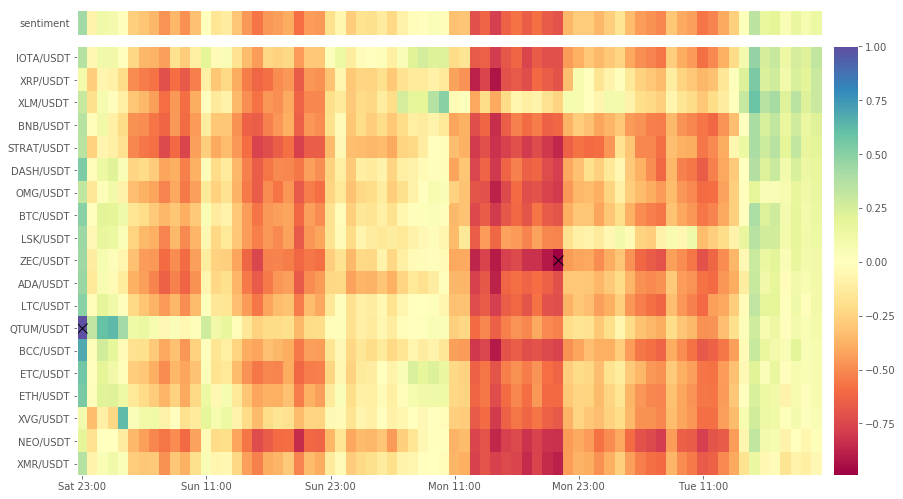

In [52]:
window = 20
oversold = 30
overbought = 70

df = utils.to_df(ohlc, 'C')
df = RSI(df, window)
df = utils.trunk(df, [oversold, overbought])
df = utils.rescale(df, [-1, 1])
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

## *CCI*

In [41]:
def cci(df, period):
    # (Typical Price  -  20-period SMA of TP) / (.015 x Mean Deviation)
    tp_sma = df.rolling(period).mean()
    md = df.rolling(period).apply(lambda a: np.fabs(a - a.mean()).mean())
    return (df - tp_sma) / (.015 * md)

    count     mean       std  min       25%       50%       75%  max
0  1368.0 -0.15002  0.327183 -1.0 -0.371209 -0.183959  0.046096  1.0


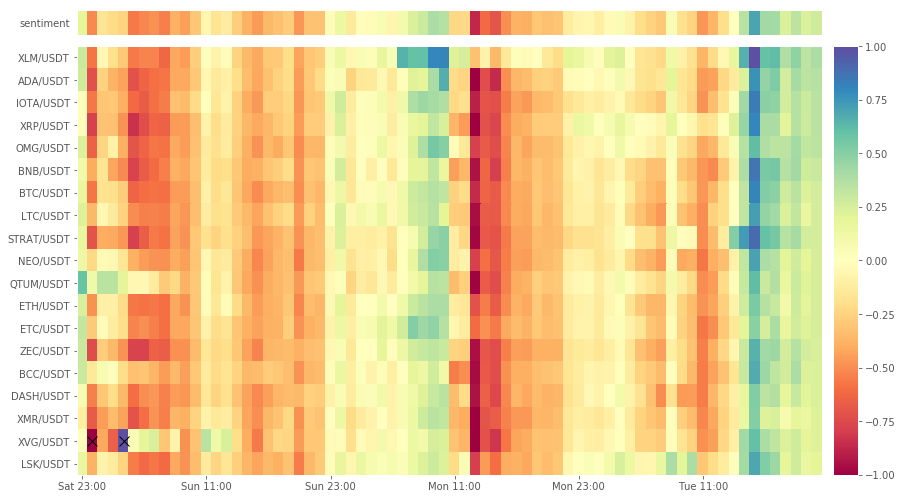

In [53]:
window = 20
oversold = -300
overbought = 300

df = utils.to_df(ohlc, 'C')
df = cci(df, window)
df = utils.trunk(df, [oversold, overbought])
df = utils.rescale(df, [-1, 1])
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

# signals

## *EMA crossover*

In [43]:
def ema_crossover(df, ema_fast, ema_slow):
    fast = df.ewm(span=ema_fast, adjust=False).mean()
    slow = df.ewm(span=ema_slow, adjust=False).mean()
    df = fast - slow
    df[df > 0] = 1
    df[df < 0] = -1
    df = df.fillna(0)
    df = df.diff().dropna()
    pos_mask = df == 2
    neg_mask = df == -2
    df[pos_mask] = 1
    df[neg_mask] = -1
    df[~neg_mask & ~pos_mask] = 0
    return df

    count      mean       std  min  25%  50%  75%  max
0  1368.0  0.001462  0.198747 -1.0  0.0  0.0  0.0  1.0


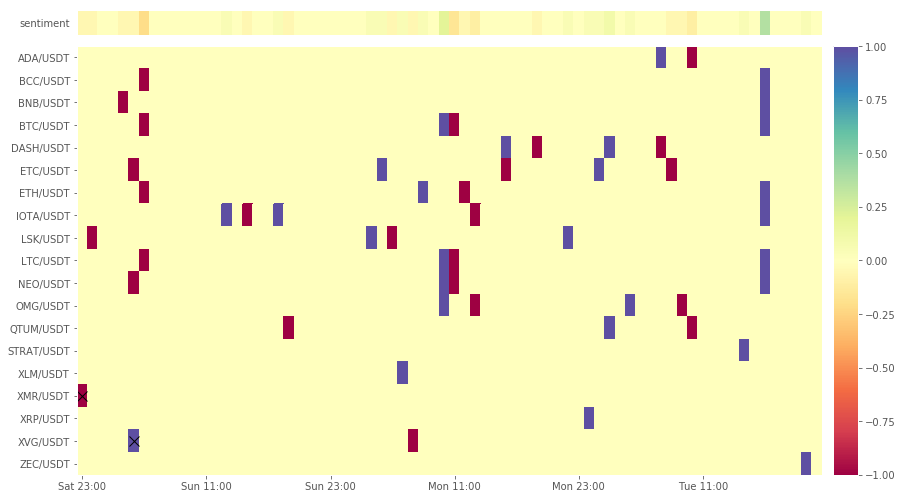

In [45]:
fast_window = 7
slow_window = 25

df = utils.to_df(ohlc, 'M')
df = ema_crossover(df, fast_window, slow_window)
df = utils.cut_df(df, display_window)

plot.evolution(df, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')

## *BollingerBand*

### How wide is the BB?

In [46]:
def BB(df, window, k):
    sma = df.rolling(window=window).mean()
    std = df.rolling(window=window).std()
    BOLU = sma + std * k
    BOLD = sma - std * k
    return BOLD, BOLU

def corridor(BOLD, BOLU):
    return BOLU - BOLD

    count      mean       std       min       25%       50%       75%  \
0  1368.0 -0.021826  0.447477 -0.760223 -0.459024 -0.049956  0.405161   

        max  
0  0.791744  


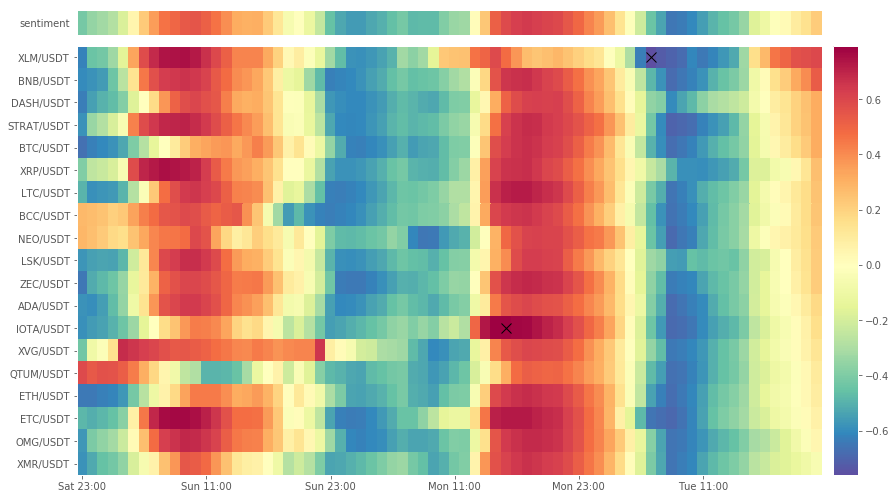

In [48]:
window = 20
k = 2

df = utils.to_df(ohlc, 'C')
df = corridor(*BB(df, window, k)).dropna()
df = utils.rolling_normalize(df, 'mean', window).dropna()
df1 = utils.cut_df(df, display_window)

plot.evolution(df1, plt.cm.Spectral_r, plot.midpoint_norm(0), rank='last')

### Does the price exceed the BB?

    count      mean       std       min       25%       50%      75%      max
0  1368.0 -0.285693  0.578346 -1.686726 -0.706793 -0.358116  0.05678  1.73774


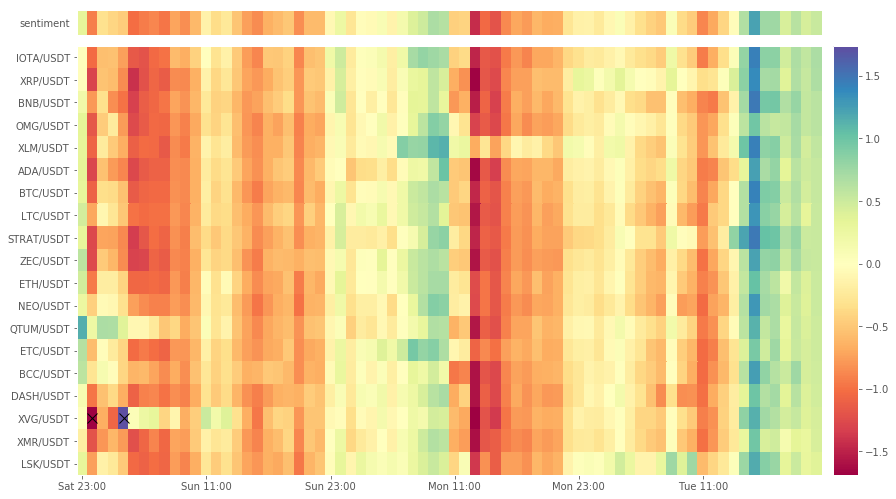

In [51]:
reload(utils)
df = utils.to_df(ohlc, 'C')
df = utils.range_rescale(df, BB(df, window, k), [-1, 1]).dropna()
df2 = utils.cut_df(df, display_window)

plot.evolution(df2, plt.cm.Spectral, plot.midpoint_norm(0), rank='last')